In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src import data_loader, features

In [2]:
# Load data
df = data_loader.load_single_file("../data/raw/AEP_hourly.csv")

# Create temporal features
df = features.add_time_features(df)

# Check for empty values
if df.isna().sum().iloc[0]!=0:
    df.interpolate(method="time", inplace=True)     # Data linear interpolation

In [3]:
# Frequency of the Dataframe
if df.index.inferred_freq==None:
    freq_std=df.index.to_series().diff().std()
    if freq_std!=0:
        print("The frequencies are irregular")
        print("-----------------------------------------------------")
        print("Average frequency:", df.index.to_series().diff().mean())
        print("Most common frequency:", df.index.to_series().diff().mode()[0])
        print("Standard deviation of the frequencies:", freq_std)
    else:
        print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())      
else:
    print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())

df = df.resample("h").mean()

# Frequency of the Dataframe
if df.index.inferred_freq==None:
    freq_std=df.index.to_series().diff().std()
    if freq_std!=0:
        print("The frequencies are irregular")
        print("-----------------------------------------------------")
        print("Average frequency:", df.index.to_series().diff().mean())
        print("Most common frequency:", df.index.to_series().diff().mode()[0])
        print("Standard deviation of the frequencies:", freq_std)
    else:
        print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())      
else:
    print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())

The frequencies are irregular
-----------------------------------------------------
Average frequency: 0 days 01:00:00.682762715
Most common frequency: 0 days 01:00:00
Standard deviation of the frequencies: 0 days 00:00:57.553840747
The frequencies are regular and their value is: 0 days 01:00:00


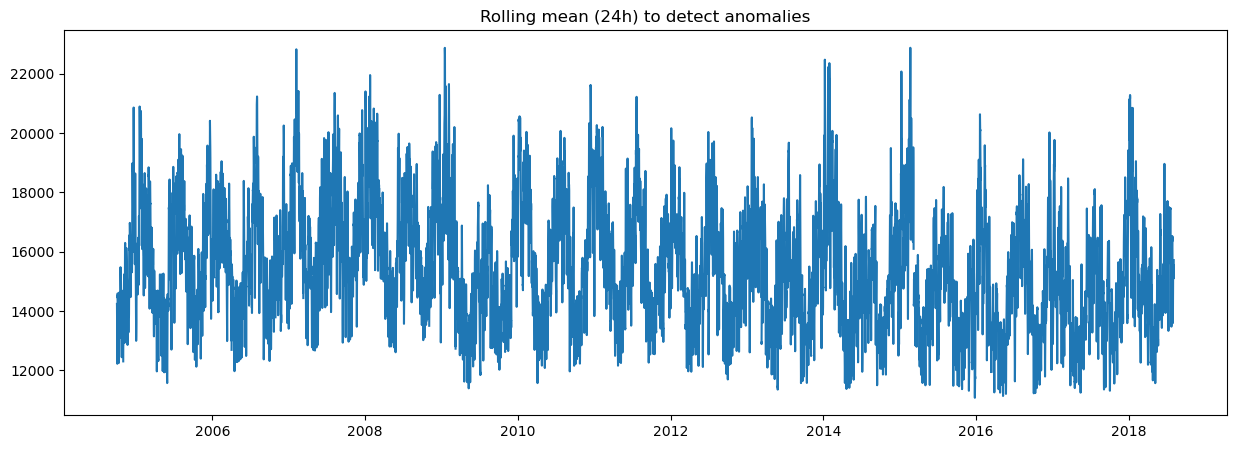

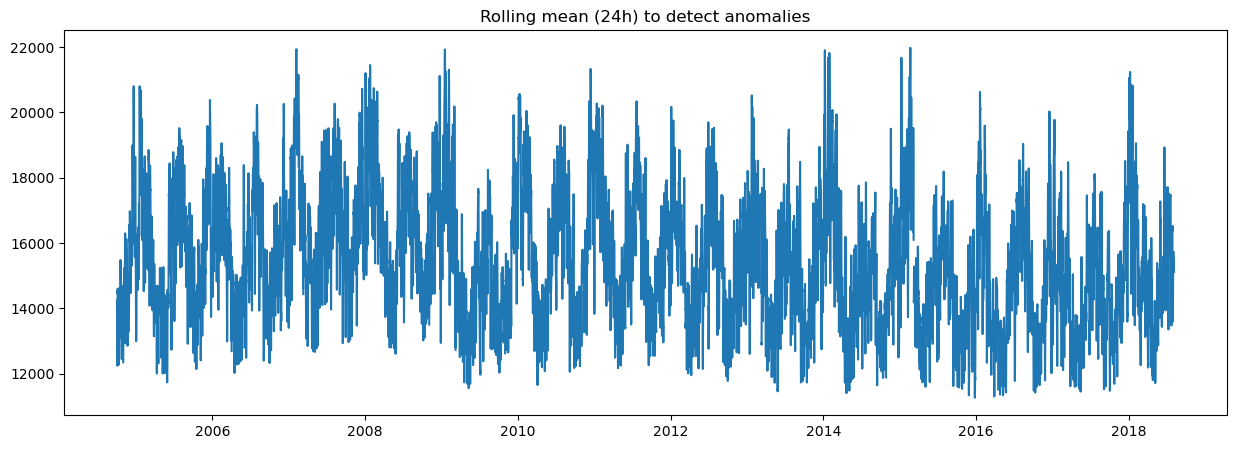

In [4]:
# Plot data to check for anomalies
plt.figure(figsize=(15,5))
plt.plot(df["AEP_MW"].rolling(24).mean())
plt.title("Rolling mean (24h) to detect anomalies")
plt.show()

# Detect and get rid of the anomalies (the ones that have extremely low or high values) by replacing them with the value of the quantiles 1% or 99% respectively
q_low = df["AEP_MW"].quantile(0.01)
q_high = df["AEP_MW"].quantile(0.99)
df["AEP_MW"] = df["AEP_MW"].clip(lower=q_low, upper=q_high)

# Plot the resulting data
plt.figure(figsize=(15,5))
plt.plot(df["AEP_MW"].rolling(24).mean())
plt.title("Rolling mean (24h) to detect anomalies")
plt.show()

In [5]:
# Normalize data (necessary for some models)
scaler = MinMaxScaler()
df["AEP_MW_scaled"] = scaler.fit_transform(df[["AEP_MW"]])

# Save processed data
processed_dir = "../data/processed"
df.to_csv(f"{processed_dir}/AEP_hourly_processed.csv")